In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
states_all.csv	StudentsPerformance.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv("states_all.csv", index_col=0)
data.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,
1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [14]:
x=data[data.STATE=='CALIFORNIA']
x

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,
1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,1615630.0,1916061.0,66450.0,448237.0,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN
1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,8603751.0,2181053.0,2669270.0,69182.0,472334.0,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN
1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN
1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,10040400.0,1792979.0,3088674.0,76584.0,463684.0,451069.0,412604.0,317595.0,3591033.0,1578929.0,5803887.0,NaN,NaN,NaN,NaN
1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,10939061.0,1862674.0,4335730.0,81926.0,459262.0,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,11539910.0,1954362.0,4738866.0,85992.0,459771.0,489356.0,431730.0,347914.0,3734997.0,1675778.0,6038590.0,NaN,NaN,NaN,NaN
2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,2269603.0,5849441.0,89919.0,459771.0,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN


In [15]:
pd.options.display.float_format='{:.2f}'.format # e leri atmak düzgün göstermek için yaptık
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.00,1224.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1224.00,1275.00,1542.00,1632.00,1632.00,1632.00,1632.00,1020.00,1071.00,1632.00,565.00,602.00,650.00,562.00
mean,2002.08,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,236.33,278.28,218.81,263.56
std,9.57,1066514.20,11759620.23,1146991.51,5549734.82,5489561.97,11992791.01,6300569.34,3357214.50,534789.31,1329473.47,30016.60,80671.03,79957.99,77965.85,67438.53,675783.66,330709.79,1055892.95,9.29,10.34,7.68,6.61
min,1986.00,43866.00,465650.00,31020.00,0.00,22093.00,481665.00,265549.00,139963.00,11541.00,12708.00,96.00,5122.00,4577.00,3371.00,2572.00,37698.00,13530.00,68449.00,192.00,231.00,179.00,236.00
25%,1994.00,264514.50,2189503.50,189957.50,1165776.00,715121.00,2170404.00,1171336.50,638076.00,103449.25,181507.00,2199.75,19029.75,18971.50,19594.25,16076.50,164925.00,80608.00,248083.25,232.00,272.00,215.00,260.00
50%,2002.00,649933.50,5085826.00,403548.00,2537754.00,2058996.00,5242672.00,2658253.00,1525471.00,271704.00,510428.00,8258.00,48122.00,49087.00,47880.00,39408.00,405111.50,186919.00,645805.00,238.00,280.50,220.00,265.00
75%,2010.00,1010532.00,10845163.00,827932.00,5055547.50,4755293.00,10744201.50,5561959.00,3222924.50,517222.25,966148.00,22691.75,78864.25,78504.25,78976.00,69397.25,643975.25,322328.00,1043420.50,242.00,286.00,224.00,268.00
max,2019.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,26058021.00,3995951.00,10223657.00,256222.00,535379.00,493415.00,500143.00,498403.00,3929869.00,2013687.00,6441557.00,253.00,301.00,237.00,280.00


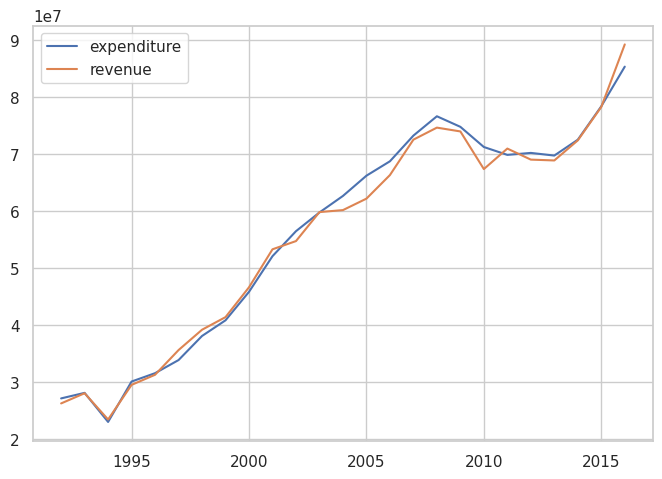

In [16]:
x=data[data.STATE=='CALIFORNIA']['YEAR']
y=data[data.STATE=='CALIFORNIA']['TOTAL_EXPENDITURE']
y2=data[data.STATE=='CALIFORNIA']['TOTAL_REVENUE']
plt.plot(x,y,label='expenditure')
plt.plot(x,y2,label='revenue')
plt.legend()
plt.show()

In [0]:
data['f4']=data.AVG_MATH_4_SCORE-data.AVG_READING_4_SCORE
data['f8']=data.AVG_MATH_8_SCORE-data.AVG_READING_8_SCORE

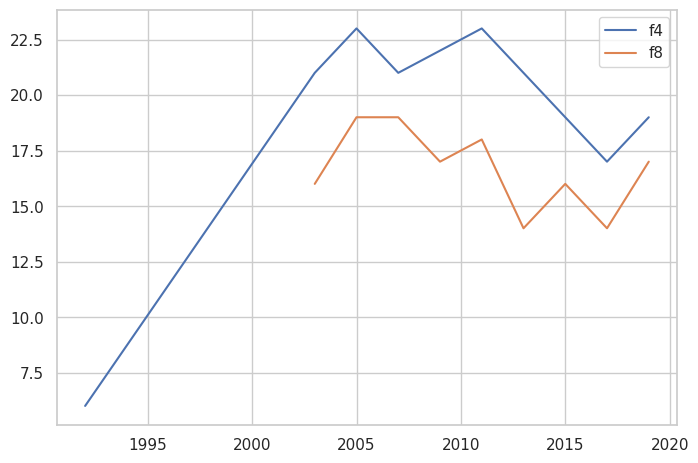

In [18]:
x=data[data.STATE=='CALIFORNIA'][['YEAR','f4']].dropna().YEAR
x2=data[data.STATE=='CALIFORNIA'][['YEAR','f8']].dropna().YEAR
y=data[data.STATE=='CALIFORNIA'][['YEAR','f4']].dropna().f4
y2=data[data.STATE=='CALIFORNIA'][['YEAR','f8']].dropna().f8
#plt.xticks(np.arange(min(x),max(x)+1,1.0))
plt.plot(x,y,label='f4')
plt.plot(x2,y2,label='f8')
plt.legend()
plt.show()

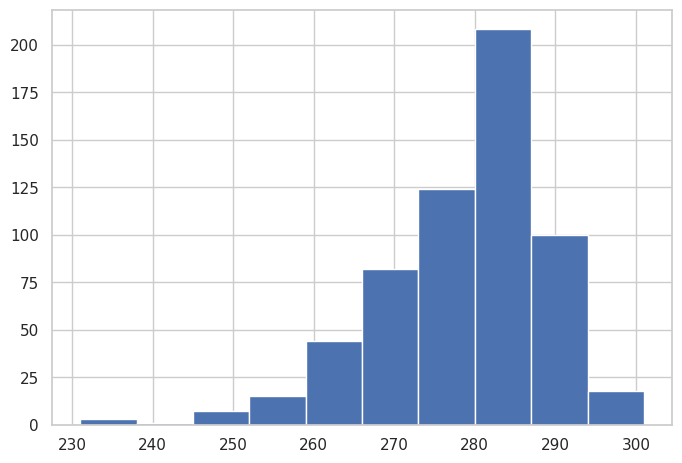

In [19]:
plt.hist(data.AVG_MATH_8_SCORE)
plt.show()

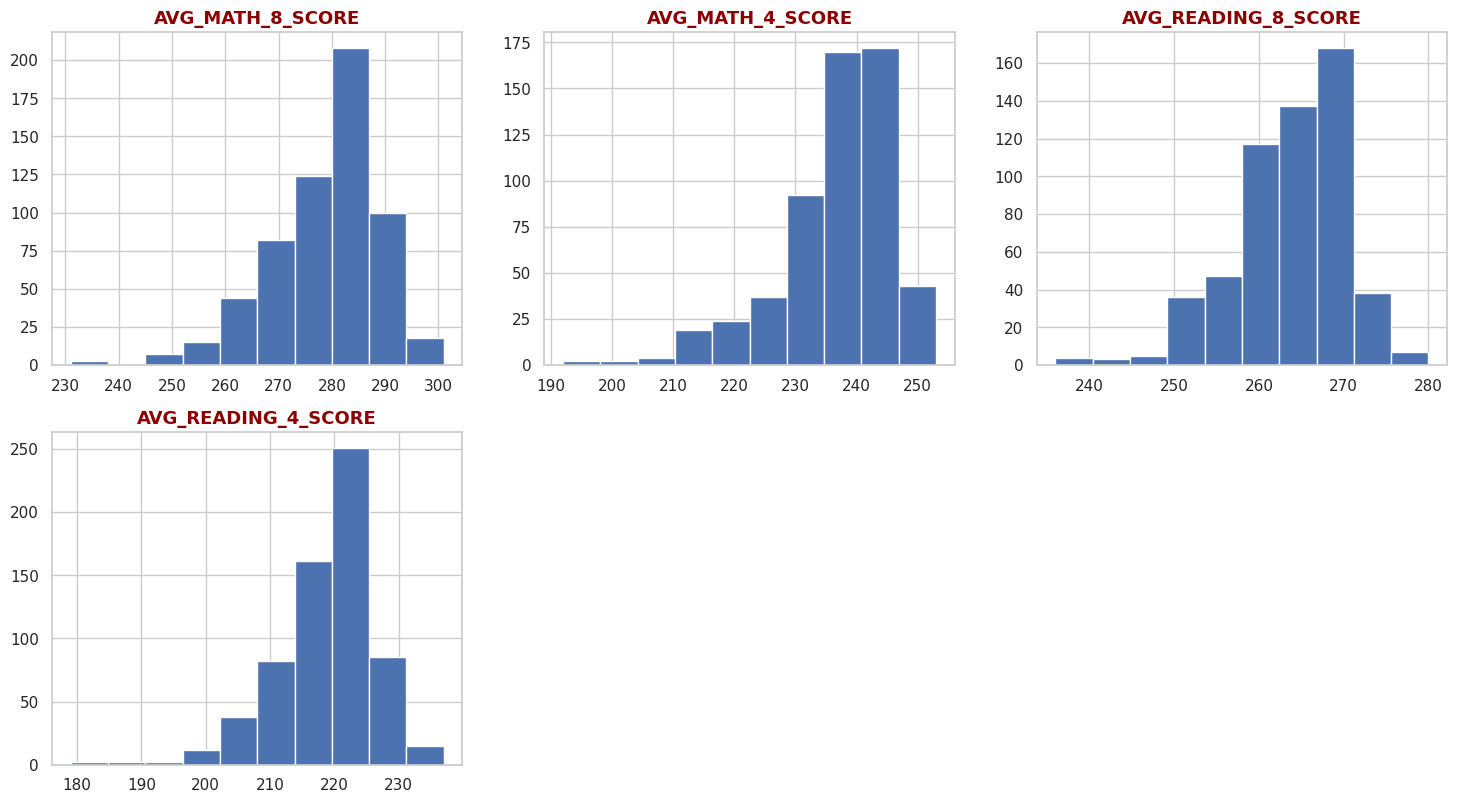

In [21]:
plt.figure(figsize=(18,15)) # Bu önemli bi görselleştirme 3 lü karşılaştırma
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
dersNotlari_list=['AVG_MATH_8_SCORE','AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE']
winsorize_degiskenler = ['winsorize_aboneler', 'winsorize_video_sayisi', 'winsorize_goruntulenme']

for i in range(4):
    plt.subplot(3, 3, i+1)
    plt.hist(data[dersNotlari_list[i]])
    plt.title(dersNotlari_list[i], fontdict=baslik_font)

In [0]:
for col in dersNotlari_list:
    data.loc[:, col].fillna(data.loc[:, col].interpolate(), inplace=True)

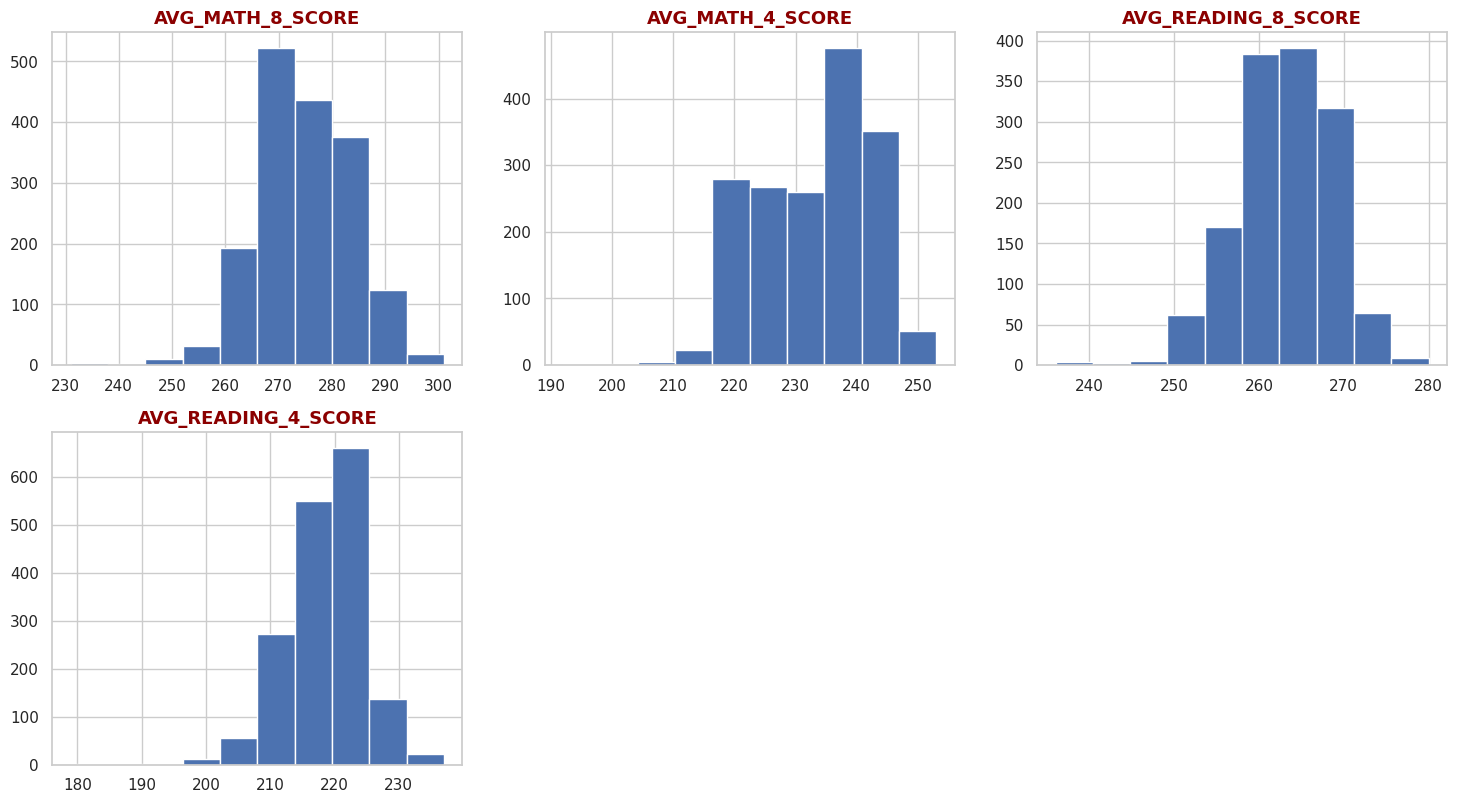

In [25]:
plt.figure(figsize=(18,15))
for i in range(4):
    plt.subplot(3, 3, i+1)
    plt.hist(data[dersNotlari_list[i]])
    plt.title(dersNotlari_list[i], fontdict=baslik_font)